# Analyzing Popular App Categories on Google Play

Our objective in this project is to identify the types of applications that demonstrate popularity on the Google Play Store.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [12]:
#Reading the dataset
android_df = pd.read_csv('googleplaystore.csv')

In [13]:
android_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [14]:
android_df["Category"].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [15]:
android_df[android_df["Category"] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
android_df[android_df["Category"] == "1.9"].values

array([['Life Made WI-Fi Touchscreen Photo Frame', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', nan, 'February 11, 2018',
        '1.0.19', '4.0 and up', nan]], dtype=object)

In [17]:
clean_lst = ['Life Made WI-Fi Touchscreen Photo Frame', 'LIFESTYLE' , '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', 'LIFESTYLE' , 'February 11, 2018',
        '1.0.19', '4.0 and up']
clean_lst

['Life Made WI-Fi Touchscreen Photo Frame',
 'LIFESTYLE',
 '1.9',
 19.0,
 '3.0M',
 '1,000+',
 'Free',
 '0',
 'Everyone',
 'LIFESTYLE',
 'February 11, 2018',
 '1.0.19',
 '4.0 and up']

In [18]:
android_df[android_df["Category"] == "1.9"] = clean_lst

In [19]:
android_df["Category"].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               383
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [23]:
app_count = android_df["App"].value_counts()
app_count

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [22]:
"Instagram" in app_count[app_count>1].index

True

In [25]:
duplicated = android_df[android_df.duplicated(subset = ["App"] ,keep=False)]
duplicated[duplicated["App"]=="Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [26]:
duplicated = android_df[android_df.duplicated(subset = ["App"] ,keep='first')]
duplicated[duplicated["App"]=="Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [27]:
duplicated = android_df[android_df.duplicated(subset = ["App"] ,keep='last')]
duplicated[duplicated["App"]=="Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [28]:
num_duplicated = duplicated["App"].nunique()
num_duplicated

798

In [30]:
duplicated.shape

(1181, 13)

In [31]:
android_df.shape[0]

10841

In [38]:
max_reviews =android_df.groupby("App")["Reviews"].max()

In [36]:
for index , row in android_df.iterrows():
    if row["App"] == "Instagram":
        print(row["App"] , row["Reviews"])

Instagram 66577313
Instagram 66577446
Instagram 66577313
Instagram 66509917


In [39]:
android_clean = []# to store clean data
already_added = [] # to keep track of already added apps

for index,row in android_df.iterrows(): # iterate Through each row in dataframe
    name = row["App"]
    n_reviews = row["Reviews"]
    #Check of the current app has max no of reviews and had not been added before
    if (max_reviews[name]==n_reviews) and (name not in already_added):
        android_clean.append(row) #add the app to the clean list
        already_added.append(name) #add the app name to the already added list

In [40]:
android_clean = pd.DataFrame(android_clean) # converted the list to a data frame

In [41]:
android_clean.shape

(9660, 13)

# Separating English Applications:

In [42]:
def is_english(app_name):
    lst = []
    for i in app_name:
        if ord(i)>127:
            lst.append(False)
        else:
            lst.append(True)
    non_ascii = 0
    for j in lst:
        if j == False:
            non_ascii+=1
    if non_ascii>3:
        return False
    else:
        return True

In [43]:
english_apps = android_clean[android_clean["App"].apply(is_english)]

In [44]:
english_apps.shape

(9615, 13)

In [45]:
english_apps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880,28M,"1,000,000+",Free,0,Everyone,Art & Design,"October 27, 2017",1.0.4,4.1 and up


# Isolating Free Applications:

In [46]:
english_apps["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$11.99', '$79.99', '$16.99', '$14.99', '$1.00',
       '$29.99', '$12.99', '$2.49', '$24.99', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [47]:
final_df = english_apps[english_apps["Price"]=="0"]
final_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


# Analysis:

In [48]:
final_df["Category"].value_counts()

FAMILY                 1678
GAME                    859
TOOLS                   749
BUSINESS                407
LIFESTYLE               347
PRODUCTIVITY            345
FINANCE                 328
MEDICAL                 312
SPORTS                  301
PERSONALIZATION         294
COMMUNICATION           287
HEALTH_AND_FITNESS      273
PHOTOGRAPHY             261
NEWS_AND_MAGAZINES      248
SOCIAL                  236
TRAVEL_AND_LOCAL        207
SHOPPING                199
BOOKS_AND_REFERENCE     190
DATING                  165
VIDEO_PLAYERS           159
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          110
EDUCATION               104
ENTERTAINMENT            85
LIBRARIES_AND_DEMO       83
AUTO_AND_VEHICLES        82
HOUSE_AND_HOME           73
WEATHER                  71
EVENTS                   63
PARENTING                58
ART_AND_DESIGN           57
COMICS                   55
BEAUTY                   53
Name: Category, dtype: int64

In [49]:
final_df["Category"].value_counts(normalize = True)*100 #to get percentage

FAMILY                 18.932641
GAME                    9.691978
TOOLS                   8.450863
BUSINESS                4.592125
LIFESTYLE               3.915153
PRODUCTIVITY            3.892587
FINANCE                 3.700779
MEDICAL                 3.520253
SPORTS                  3.396141
PERSONALIZATION         3.317161
COMMUNICATION           3.238181
HEALTH_AND_FITNESS      3.080221
PHOTOGRAPHY             2.944827
NEWS_AND_MAGAZINES      2.798150
SOCIAL                  2.662755
TRAVEL_AND_LOCAL        2.335552
SHOPPING                2.245289
BOOKS_AND_REFERENCE     2.143744
DATING                  1.861672
VIDEO_PLAYERS           1.793975
MAPS_AND_NAVIGATION     1.399075
FOOD_AND_DRINK          1.241115
EDUCATION               1.173418
ENTERTAINMENT           0.959043
LIBRARIES_AND_DEMO      0.936477
AUTO_AND_VEHICLES       0.925195
HOUSE_AND_HOME          0.823649
WEATHER                 0.801083
EVENTS                  0.710820
PARENTING               0.654406
ART_AND_DE

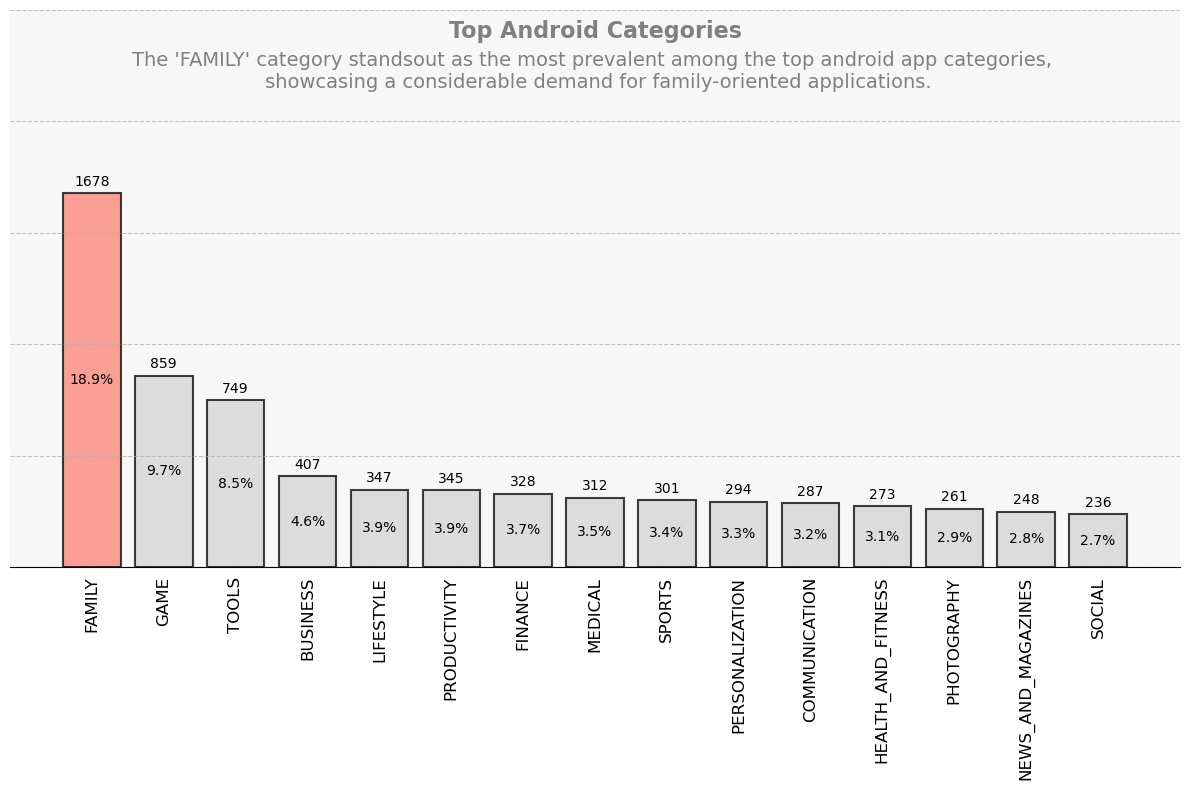

In [51]:
#Data for graph
categories = final_df["Category"].value_counts().index[:15]
counts = final_df["Category"].value_counts().values[:15]
percentage = round(final_df["Category"].value_counts(normalize=True)*100,1)[:15]
#plotting data
plt.figure(figsize=(12,8))
bars = plt.bar(categories,counts,alpha=0.75,color = "lightgray",edgecolor = "black",linewidth = 1.5)
plt.xticks(rotation = 90,fontsize =12)
plt.yticks(fontsize=12)
plt.grid(axis='y',linestyle='--',alpha=0.75)
plt.yticks(range(0,3000,500),[],fontsize=12)#customized tick labels and y-ticks range
plt.xticks(fontsize=12)
plt.tick_params(left=0,bottom=0)
#separating max category
max_cat=categories[counts.argmax()]
#highlighting category with highest count
max_cat_index = list(categories).index(max_cat)
bars[max_cat_index].set_color("Salmon")
bars[max_cat_index].set_edgecolor('black')
#adding data labels and percentages inside each bar
for bar,perc in zip(bars,percentage):
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,height+20,'%d'%int(height),ha="center",va='bottom',
             fontsize=10)
    plt.text(bar.get_x()+bar.get_width()/2,height/2,f"{perc}%",ha="center",va="center",
             color='black',fontsize=10)
#adding background color
ax = plt.gca()
ax.set_facecolor("#f7f7f7")
#adding chart title inside the chart
plt.text(0.5,0.95,"Top Android Categories",ha="center",fontsize=16,transform=plt.gca().transAxes,
        color="grey",fontweight="bold")
#adding conclusion inside the chart
plt.text(0.5,0.86,"The 'FAMILY' category standsout as the most prevalent among the top android app categories, \n showcasing a considerable demand for family-oriented applications.",
        ha="center",fontsize=14,transform=plt.gca().transAxes,color="grey")
#removing spines
for i in ["top","right","left"]:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout() #to adjust layout to avoid clipping

plt.show()

In [52]:
final_df[final_df["Category"]=="FAMILY"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774,19M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 23, 2018",1.9.3901,4.0.3 and up
2018,Coloring & Learn,FAMILY,4.4,12753,51M,"5,000,000+",Free,0,Everyone,Educational;Creativity,"July 17, 2018",1.49,4.0.3 and up
2019,Mahjong,FAMILY,4.5,33983,22M,"5,000,000+",Free,0,Everyone,Puzzle;Brain Games,"August 2, 2018",1.24.3181,4.0.3 and up
2020,Super ABC! Learning games for kids! Preschool ...,FAMILY,4.6,20267,46M,"1,000,000+",Free,0,Everyone,Educational;Education,"July 16, 2018",1.1.6.7,4.1 and up
2021,Toy Pop Cubes,FAMILY,4.5,5761,21M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 4, 2018",1.8.3181,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,Poop FR,FAMILY,NaN,6,2.5M,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


# Most popular app by Installs

In [53]:
final_df["Installs"].value_counts(normalize=True)*100

1,000,000+        15.739592
100,000+          11.553650
10,000,000+       10.515627
10,000+           10.199707
1,000+             8.405732
100+               6.916394
5,000,000+         6.837414
500,000+           5.573733
50,000+            4.772650
5,000+             4.513145
10+                3.542818
500+               3.249464
50,000,000+        2.290421
100,000,000+       2.121178
50+                1.918086
5+                 0.789800
1+                 0.507729
500,000,000+       0.270789
1,000,000,000+     0.225657
0+                 0.045131
0                  0.011283
Name: Installs, dtype: float64

In [54]:
final_df["Install_int"] = final_df["Installs"].str.replace(",","").str.replace("+","").astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_4092\2633429539.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final_df["Install_int"]=final_df["Installs"].str.replace(",","").str.replace("+","").astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_4092\2633429539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["Install_int"]=final_df["Installs"].str.replace(",","").str.replace("+","").astype(int)


In [55]:
install_frq = final_df["Install_int"].value_counts().sort_index()
install_frq = install_frq[install_frq.index > 500]
install_frq

1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: Install_int, dtype: int64

In [56]:
install_frq_per = round(final_df["Install_int"].value_counts(normalize=True)*100,2).sort_index()
install_frq_per = install_frq_per[install_frq_per.index > 500]
install_frq_per

1000           8.41
5000           4.51
10000         10.20
50000          4.77
100000        11.55
500000         5.57
1000000       15.74
5000000        6.84
10000000      10.52
50000000       2.29
100000000      2.12
500000000      0.27
1000000000     0.23
Name: Install_int, dtype: float64

In [57]:
def alphanumeric_units(num):
    if num >= 1e9:
        return f'{num/1e9:.0f}B' # ":.0f" means zero fraction values
    elif num >= 1e6:
        return f'{num/1e6:.0f}M'
    elif num >= 1e3:
        return f'{num/1e3:.0f}k'
    else:
        return f'{num:0f}'

In [58]:
install_frq.index=install_frq.index.map(alphanumeric_units)
install_frq

1k       745
5k       400
10k      904
50k      423
100k    1024
500k     494
1M      1395
5M       606
10M      932
50M      203
100M     188
500M      24
1B        20
Name: Install_int, dtype: int64

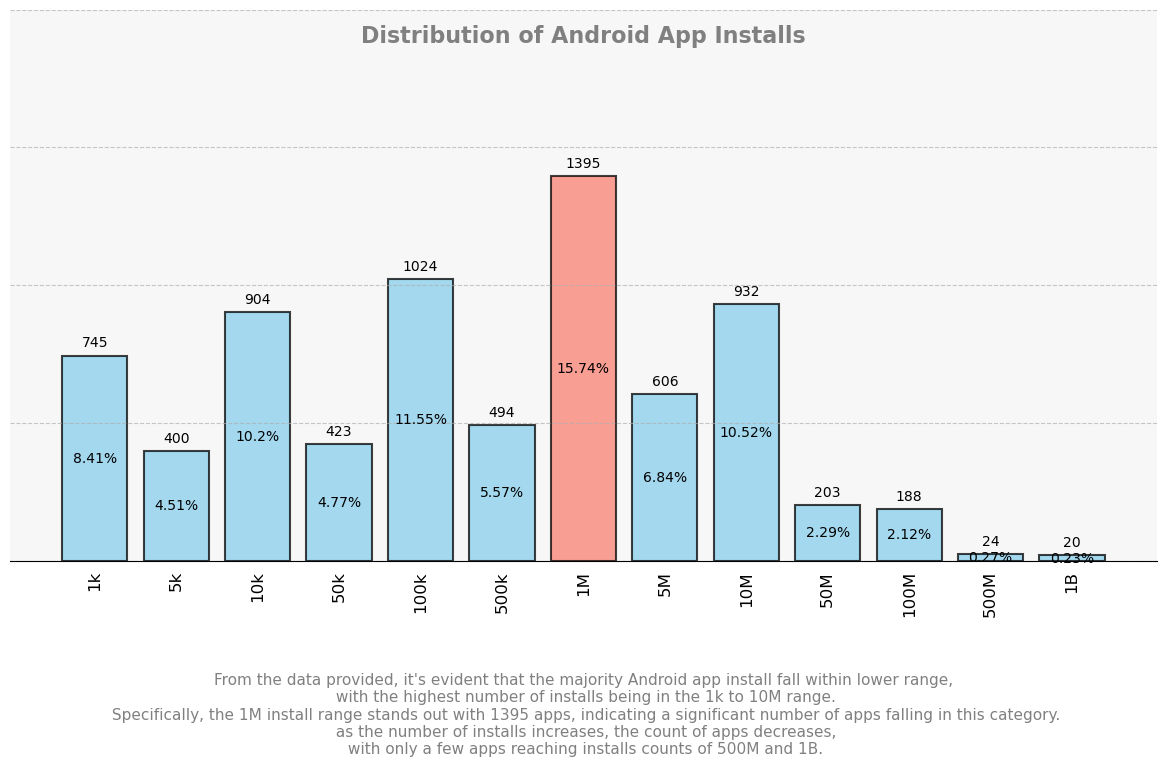

In [59]:
plt.figure(figsize=(12, 8)) 
#Data
categories = install_frq.index
counts = install_frq.values
percentage = install_frq_per.values
#plotting
bars = plt.bar(categories,counts,color='skyblue',alpha=0.75,edgecolor='black',linewidth=1.5)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.yticks(range(0,2500,500),[],fontsize=12)
plt.tick_params(left=0,bottom=0)
#max count category
max_category = categories[counts.argmax()]
#highlighting the bar
max_cat_index = list(categories).index(max_category)
bars[max_cat_index].set_color("Salmon")
bars[max_cat_index].set_edgecolor("black")
#adding data labels and percentages
for bar,perc in zip(bars,percentage):
    height=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,height+20,"%d"%int(height),
             ha="center",va="bottom",fontsize=10)
    plt.text(bar.get_x()+bar.get_width()/2,height/2,f'{perc}%',ha="center",
            va="center",fontsize=10,color="black")
#Adding a background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')
#adding title
plt.text(0.5,0.94,"Distribution of Android App Installs",ha="center",fontsize=16,
        transform=plt.gca().transAxes,color='grey',weight="bold")
#adding conclusion
plt.text(0.5,-0.35,"From the data provided, it's evident that the majority Android app install fall within lower range,\n with the highest number of installs being in the 1k to 10M range.\n Specifically, the 1M install range stands out with 1395 apps, indicating a significant number of apps falling in this category.\n as the number of installs increases, the count of apps decreases,\n with only a few apps reaching installs counts of 500M and 1B.",ha="center",fontsize=11,
        transform=plt.gca().transAxes,color='grey')
#removing spines
for i in ["top","right","left"]:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout()

plt.show()

In [60]:
android_categories=final_df["Category"].unique()
android_categories

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [61]:
pd.pivot_table(final_df,values="Install_int",index="Category",aggfunc='mean')

,Install_int
Category,
ART_AND_DESIGN,1.986335e+06
AUTO_AND_VEHICLES,6.473178e+05
BEAUTY,5.131519e+05
BOOKS_AND_REFERENCE,8.767812e+06
BUSINESS,1.712290e+06
COMICS,8.176573e+05
COMMUNICATION,3.845612e+07
DATING,8.540288e+05
EDUCATION,1.820673e+06


In [62]:
pd.options.display.float_format = '{:.0f}'.format

In [63]:
categories_installs = pd.pivot_table(final_df,values="Install_int",index="Category",aggfunc='mean')
categories_installs = categories_installs.sort_values(by="Install_int",ascending=False)
categories_installs = categories_installs["Install_int"]
categories_installs

Category
COMMUNICATION         38456119
VIDEO_PLAYERS         24727872
SOCIAL                23253652
PHOTOGRAPHY           17805628
PRODUCTIVITY          16787331
GAME                  15560966
TRAVEL_AND_LOCAL      13984078
ENTERTAINMENT         11640706
TOOLS                 10682301
NEWS_AND_MAGAZINES     9549178
BOOKS_AND_REFERENCE    8767812
SHOPPING               7036877
PERSONALIZATION        5201483
WEATHER                5074486
HEALTH_AND_FITNESS     4188822
MAPS_AND_NAVIGATION    4056942
FAMILY                 3694276
SPORTS                 3638640
ART_AND_DESIGN         1986335
FOOD_AND_DRINK         1924898
EDUCATION              1820673
BUSINESS               1712290
LIFESTYLE              1433676
FINANCE                1387692
HOUSE_AND_HOME         1331541
DATING                  854029
COMICS                  817657
AUTO_AND_VEHICLES       647318
LIBRARIES_AND_DEMO      638504
PARENTING               542604
BEAUTY                  513152
EVENTS                  253542

In [64]:
def alphanumeric_units(num):
    if num >= 1e9:
        return f'{num/1e9:.1f}B' # ":.1f" means one fraction values
    elif num >= 1e6:
        return f'{num/1e6:.1f}M'
    elif num >= 1e3:
        return f'{num/1e3:.1f}k'
    else:
        return f'{num:.1f}'

In [65]:
categories_installs_unit = categories_installs.map(alphanumeric_units)
categories_installs_unit

Category
COMMUNICATION           38.5M
VIDEO_PLAYERS           24.7M
SOCIAL                  23.3M
PHOTOGRAPHY             17.8M
PRODUCTIVITY            16.8M
GAME                    15.6M
TRAVEL_AND_LOCAL        14.0M
ENTERTAINMENT           11.6M
TOOLS                   10.7M
NEWS_AND_MAGAZINES       9.5M
BOOKS_AND_REFERENCE      8.8M
SHOPPING                 7.0M
PERSONALIZATION          5.2M
WEATHER                  5.1M
HEALTH_AND_FITNESS       4.2M
MAPS_AND_NAVIGATION      4.1M
FAMILY                   3.7M
SPORTS                   3.6M
ART_AND_DESIGN           2.0M
FOOD_AND_DRINK           1.9M
EDUCATION                1.8M
BUSINESS                 1.7M
LIFESTYLE                1.4M
FINANCE                  1.4M
HOUSE_AND_HOME           1.3M
DATING                 854.0k
COMICS                 817.7k
AUTO_AND_VEHICLES      647.3k
LIBRARIES_AND_DEMO     638.5k
PARENTING              542.6k
BEAUTY                 513.2k
EVENTS                 253.5k
MEDICAL                120.6k
N

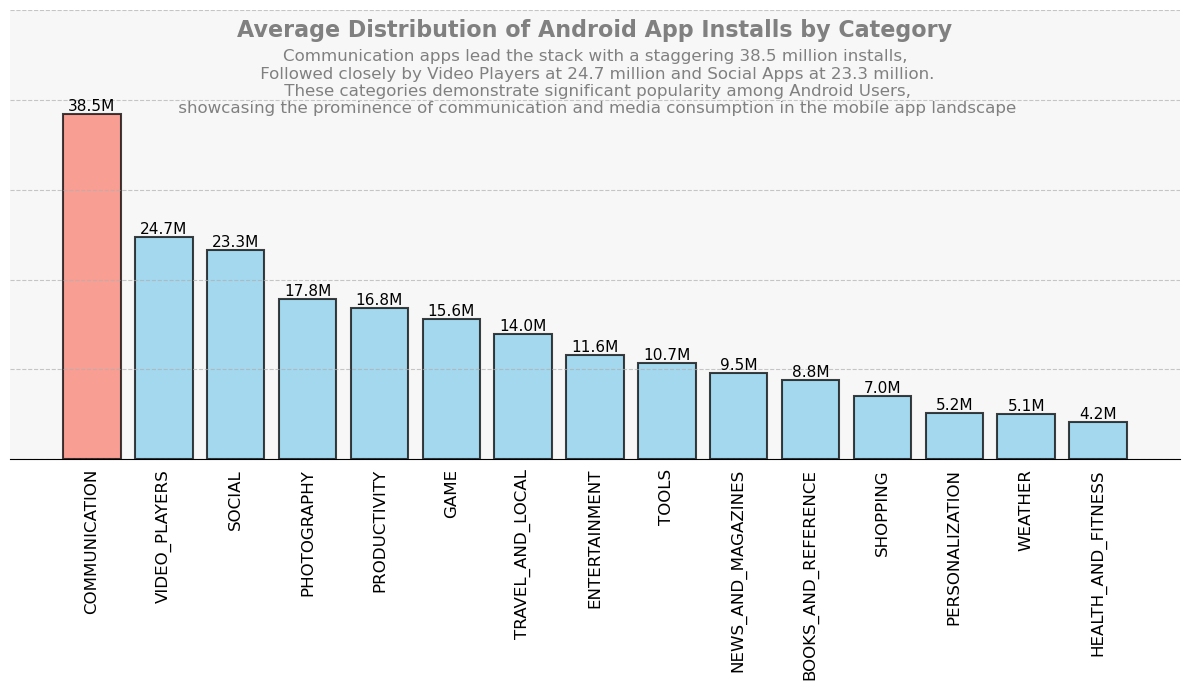

In [66]:
#Data
categories = categories_installs.index[:15]
counts = categories_installs.values[:15]
#create stylish bar chart
plt.figure(figsize=(12,7))
bars= plt.bar(categories,counts,color="skyblue",alpha=0.75,edgecolor="black",linewidth=1.5)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.yticks(range(0,60000000,10000000),[],fontsize=12)
plt.tick_params(left=0,bottom=0)
#finding the category with highest count
max_category = categories[counts.argmax()]
#highlight the bar having category with highest count
max_cat_index = list(categories).index(max_category)
bars[max_cat_index].set_color("Salmon")
bars[max_cat_index].set_edgecolor("Black")
#adding data labels and percentages inside each bar
for bar,units in zip(bars,categories_installs_unit.values):
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, height + 25,units,ha="center",va="bottom",fontsize=11)
#adding a background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')
#adding title inside the graph
plt.text(0.5,0.94,"Average Distribution of Android App Installs by Category",ha="center",fontsize=16,
        transform=plt.gca().transAxes,color='grey',weight="bold")
#adding conclusion
plt.text(0.5,0.77,"Communication apps lead the stack with a staggering 38.5 million installs,\n Followed closely by Video Players at 24.7 million and Social Apps at 23.3 million.\n These categories demonstrate significant popularity among Android Users,\n showcasing the prominence of communication and media consumption in the mobile app landscape",ha="center",fontsize=12,
        transform=plt.gca().transAxes,color='grey')
#removing spines
for i in ["top","right","left"]:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout()

plt.show()

In [95]:
category_group = final_df.groupby("Category")
category_group

In [68]:
COMMUNICATION = category_group.get_group("COMMUNICATION").sort_values(by="Install_int",ascending=False)
COMMUNICATION.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Install_int
336,WhatsApp Messenger,COMMUNICATION,4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
464,Hangouts,COMMUNICATION,4,3419513,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,1000000000
411,Google Chrome: Fast & Secure,COMMUNICATION,4,9643041,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
391,Skype - free IM & video calls,COMMUNICATION,4,10484169,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000


In [69]:
def alphanumeric_units(num):
    if num >= 1e9:
        return f'{num/1e9:.0f}B' # ":.0f" means zero fraction values
    elif num >= 1e6:
        return f'{num/1e6:.0f}M'
    elif num >= 1e3:
        return f'{num/1e3:.0f}k'
    else:
        return f'{num:.1f}'

In [70]:
categories_installs.index[:15]

Index(['COMMUNICATION', 'VIDEO_PLAYERS', 'SOCIAL', 'PHOTOGRAPHY',
       'PRODUCTIVITY', 'GAME', 'TRAVEL_AND_LOCAL', 'ENTERTAINMENT', 'TOOLS',
       'NEWS_AND_MAGAZINES', 'BOOKS_AND_REFERENCE', 'SHOPPING',
       'PERSONALIZATION', 'WEATHER', 'HEALTH_AND_FITNESS'],
      dtype='object', name='Category')

In [72]:
df = COMMUNICATION[["App","Install_int"]].head(15)
df["Install_int_unit"] = df["Install_int"].map(alphanumeric_units)
df

,App,Install_int,Install_int_unit
336,WhatsApp Messenger,1000000000,1B
382,Messenger – Text and Video Chat for Free,1000000000,1B
464,Hangouts,1000000000,1B
411,Google Chrome: Fast & Secure,1000000000,1B
391,Skype - free IM & video calls,1000000000,1B
451,Gmail,1000000000,1B
403,LINE: Free Calls & Messages,500000000,500M
4676,Viber Messenger,500000000,500M
420,UC Browser - Fast Download Private & Secure,500000000,500M
371,Google Duo - High Quality Video Calls,500000000,500M


In [73]:
df = COMMUNICATION[["App","Install_int"]].head(15)
df["Install_int_unit"] = df["Install_int"].map(alphanumeric_units)
df

,App,Install_int,Install_int_unit
336,WhatsApp Messenger,1000000000,1B
382,Messenger – Text and Video Chat for Free,1000000000,1B
464,Hangouts,1000000000,1B
411,Google Chrome: Fast & Secure,1000000000,1B
391,Skype - free IM & video calls,1000000000,1B
451,Gmail,1000000000,1B
403,LINE: Free Calls & Messages,500000000,500M
4676,Viber Messenger,500000000,500M
420,UC Browser - Fast Download Private & Secure,500000000,500M
371,Google Duo - High Quality Video Calls,500000000,500M


In [161]:
df = category_group.get_group("VIDEO_PLAYERS").sort_values(by="Install_int",ascending=False)
df = df[["App","Install_int"]].head(15)
df["Install_int_unit"] = df["Install_int"].map(alphanumeric_units)
df

,App,Install_int,Install_int_unit
3665,YouTube,1000000000,1B
3687,Google Play Movies & TV,1000000000,1B
3711,MX Player,500000000,500M
3675,VLC for Android,100000000,100M
4688,VivaVideo - Video Editor & Photo Movie,100000000,100M
4032,Dubsmash,100000000,100M
10647,Motorola FM Radio,100000000,100M
4696,"VideoShow-Video Editor, Video Maker, Beauty Ca...",100000000,100M
3672,Motorola Gallery,100000000,100M
3691,Samsung Video Library,50000000,50M


In [75]:
df = category_group.get_group("PHOTOGRAPHY").sort_values(by="Install_int",ascending=False)
df = df[["App","Install_int"]].head(15)
df["Install_int_unit"] = df["Install_int"].map(alphanumeric_units)
df

,App,Install_int,Install_int_unit
2884,Google Photos,1000000000,1B
4574,"S Photo Editor - Collage Maker , Photo Collage",100000000,100M
2949,Camera360: Selfie Photo Editor with Funny Sticker,100000000,100M
2908,Retrica,100000000,100M
8307,LINE Camera - Photo editor,100000000,100M
2921,Photo Editor Pro,100000000,100M
2847,"Sweet Selfie - selfie camera, beauty cam, phot...",100000000,100M
2937,BeautyPlus - Easy Photo Editor & Selfie Camera,100000000,100M
2938,PicsArt Photo Studio: Collage Maker & Pic Editor,100000000,100M
5057,AR effect,100000000,100M


In [76]:
df = category_group.get_group("GAME").sort_values(by="Install_int",ascending=False)
df = df[["App","Install_int"]].head(15)
df["Install_int_unit"] = df["Install_int"].map(alphanumeric_units)
df

,App,Install_int,Install_int_unit
1872,Subway Surfers,1000000000,1B
1908,My Talking Tom,500000000,500M
1869,Candy Crush Saga,500000000,500M
1920,Temple Run 2,500000000,500M
1885,Pou,500000000,500M
1667,Sonic Dash,100000000,100M
5950,Banana Kong,100000000,100M
1919,Crossy Road,100000000,100M
1923,Talking Tom Gold Run,100000000,100M
6554,Skater Boy,100000000,100M


In [165]:
df = category_group.get_group("TRAVEL_AND_LOCAL").sort_values(by="Install_int",ascending=False)
df = df[["App","Install_int"]].head(15)
df["Install_int_unit"] = df["Install_int"].map(alphanumeric_units)
df

,App,Install_int,Install_int_unit
3223,Maps - Navigate & Explore,1000000000,1B
3232,Google Street View,1000000000,1B
3136,TripAdvisor Hotels Flights Restaurants Attract...,100000000,100M
3112,Booking.com Travel Deals,100000000,100M
9841,Google Earth,100000000,100M
3151,2GIS: directory & navigator,50000000,50M
3125,VZ Navigator,50000000,50M
3103,trivago: Hotels & Travel,50000000,50M
9833,MAPS.ME – Offline Map and Travel Navigation,50000000,50M
3217,Agoda – Hotel Booking Deals,10000000,10M


`Analysis of Travel and Local Category and Why 'Travel and Local' Dominates the Google Play Store`
`Conclusion`

Based on our examination of the Google Play Store dataset, the 'Travel and Local' category emerges as a prime option for your company's upcoming app development endeavor. With an average installation rate of around 14 million, this category signals a significant user demand for travel-oriented applications. Moreover, the 'Travel and Local' category presents comparatively lower competition, providing ample opportunities for your app to gain visibility and attract users. To ensure your app's competitiveness, consider integrating features such as tailored recommendations, interactive maps with navigation, booking and reservation functionalities, handpicked local experiences, offline access to travel resources, social sharing options, and a robust review mechanism. By harnessing these sought-after features, your app can deliver a comprehensive and user-centric solution that resonates with travelers, distinguishing itself in the market.